Universidade Federal do Rio Grande do Norte

Instituto Metroópole Digital - IMD

Disciplina: Probabilidade - IMD0033

Professor: Ivanovitch Silva

Aluna: Analla Nayane de Farias Cunha - 20150107331

1ª Unidade - Projeto 1

In [33]:
#Pre-processamento dos dados
#Coletando os dados da planilha e carregando para um dataframe
# Importar as bibliotecas necessárias
import pandas as pd
# Atribuir o nome da planilha para a variável "arquivo"
arquivo = 'imd_notas.xlsx'
# Carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Imprimir o nome das planilhas
print(excel.sheet_names)
# Carregar a planilha excel para um objeto dataframe
dados = excel.parse(0)
# Imprimir as cinco primeiras linhas do dataframe
print(dados)

['Notas']
      a_ID       CEP  ano_ingresso  periodo_ingresso     status  \
0        0  59015430          2014                 1  CANCELADO   
1        0  59015430          2014                 1  CANCELADO   
2        1  59073120          2014                 1  CANCELADO   
3        2  59072580          2014                 1      ATIVO   
4        3  59088150          2014                 1      ATIVO   
5        3  59088150          2014                 1      ATIVO   
6        4  59064245          2014                 1  CANCELADO   
7        4  59064245          2014                 1  CANCELADO   
8        5  59112430          2014                 1      ATIVO   
9        6  59152780          2014                 1  CANCELADO   
10       6  59152780          2014                 1  CANCELADO   
11       6  59152780          2014                 1  CANCELADO   
12       7  59020330          2014                 1      ATIVO   
13       8  59151610          2014                 1

1) Quantas vezes um aluno precisa fazer uma determinada disicplina para ter aprovação?

a) Por disciplina?

b) Geral (considerando as 7 disciplinas)?

In [34]:
#Questão 1
# a)
#importando a bilioteca
import numpy as np
#tabela do numero de alunos aprovados pelo a_ID e por disciplina_ID
dados["alunos_aprovados"] = dados["status.disciplina"] == "Aprovado"
list_disc = dados.pivot_table(index=[ "disciplina_ID", "a_ID"], values= ["alunos_aprovados"], aggfunc="count", fill_value=0)
#tabela de media de tentativas para aprovaçao de cada aluno e cada disciplina
list_alunos = dados.pivot_table(index=[ "disciplina_ID", "a_ID"], values= ["alunos_aprovados"], aggfunc="mean", fill_value=0)

list_disc["aprovados"] = list_disc[list_alunos != 0]
list_disc = list_disc.dropna()
list_disc = list_disc.reset_index()
#fazendo a media dos aprovados
list_media = list_disc.pivot_table(index=[ "disciplina_ID"], values= ["alunos_aprovados"], aggfunc="mean")
#imprimindo a media dos alunos aprovados por disciplina
print ("a) Media de tentativas para os alunos serem aprovados em cada disciplina: ")
list_media

a) Media de tentativas para os alunos serem aprovados em cada disciplina: 


,alunos_aprovados
disciplina_ID,
0,1.300885
1,1.028529
2,1.128310
3,1.333333
4,1.031311
5,1.362934
6,1.093525


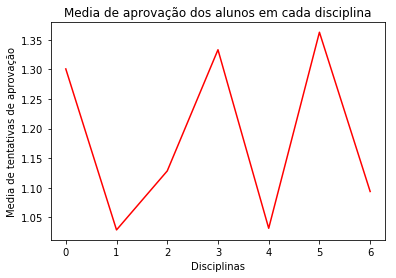

In [35]:
#Representacao visual da tabela de dados
#Grafico de Linha da media de aprovacao por disc.

#importando biblioteca matplotlib
import matplotlib.pyplot as plt 
#nomeando os eixos e titulo do grafico
plt.xlabel("Disciplinas")
plt.ylabel("Media de tentativas de aprovação")
plt.title("Media de aprovação dos alunos em cada disciplina")
#gerando o grafico das medias com a cor vermelho
plt.plot(list_media, color='red')
plt.show()

A Tabela de medias de tentativas de aprovação dos alunos do IMD em cada uma das 7 disciplinas apresentadas, foi criada baseada no "id" de cada aluno e quantas vezes esse aluno teve que pagar cada uma das disciplinas para obter o status de "Aprovado", analisando as informações que a tabela nos traz e observando o seu gráfico, podemos notar que em média, na maioria das disciplinas é necessário que os alunos tenham que pagá-las mais de uma vez para poder conseguir ser aprovado, porém essa média não chega-se ao número de 1.5 tenativas (uma tentativa e meia), devido muitos alunos que foram analisados, terem conseguido ser aprovado na disciplina na sua primeira tentativa. Observa-se também que 3 dentre as 7 disciplinas aparecem com uma média próxima de 1.0 tentativas, o que indica que a maioria dos alunos conseguiram passar em sua primeira vez nessas disciplinas. 

In [36]:
print("b) Media Geral de tentativas de aprovaçao em todas as disciplinas: ")
list_disc["alunos_aprovados"].mean()


b) Media Geral de tentativas de aprovaçao em todas as disciplinas: 


1.1414031261359505

Em geral (considerando as 7 disciplinas), a média de tentativas de aprovação dos alunos fica próxima de 1.1, o que nos indica que tratando-se das disciplinas gerais a média de tentativas chega a diminuir, aproximando-se de uma tentativa por aluno, diferente de algumas disciplinas específicas que chegam a ter médias superiores.

2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Hist.

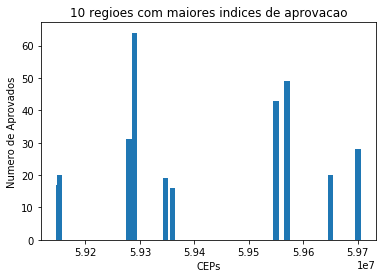

In [37]:
# Questao 2

#importando as bibliotecas 
import matplotlib.pyplot as plt
from numpy import arange
#coletando os dados do CEP e status.disciplina da base de dados
list_disc = dados.pivot_table(index=["CEP"], columns=["status.disciplina"], aggfunc={"status.disciplina":len},fill_value=0)
list_disc.columns = list_disc.columns.droplevel(0)
list_disc = pd.DataFrame(list_disc.reset_index().rename_axis(None, axis=1))
#ordenando os dados da coluna Aprovado
list_disc = list_disc.sort_values('Aprovado',  ascending=[False])

#atribuindo a lista ordenada de aprovados a variavel top10
top10 = list_disc.iloc[1:11]['Aprovado']
ceps = list(list_disc.iloc[1:11]['CEP'])
bar_positions = ceps
#criando o histograma 
plt.bar(bar_positions, top10, 10000)
#imprimindo o histograma
plt.ylabel("Numero de Aprovados")
plt.xlabel("CEPs")
plt.title("10 regioes com maiores indices de aprovacao")
plt.show()




O histograma apresentado foi criado com base nos 627 CEPs dos alunos e o seu status em cada uma das 7 disciplinas, ele nos mostra que as 10 regiões que tem o maior índice de aprovações nos componentes currículares são: O CEP 59290000 com 64 alunos aprovados, em seguida o CEP 59570000 com 49 alunos, o CEP 59550000 com 43 alunos, o CEP 59280000 com 31 alunos, o CEP 59700000 com 28 alunos, o CEP 59152600 com 20 alunos empatado com o CEP 59650000 também com 20 alunos, em seguida vem o CEP 59347000 com 19 alunos e completando o TOP 10 de CEPs com maiores números de alunos aprovados, temos o CEP 59151250 com 17 alunos aprovados. 





3) Como estão caracterizados a estatística de notas das diversas disciplinas que compoe o dataset? Boxplot

a) Período (ano)

b) Geral

C:\Users\Analla\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Analla\Anaconda3\lib\site-packages\matplotlib\cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Analla\Anaconda3\lib\site-packages\matplotlib\cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Analla\Anaconda3\lib\site-packages\matplotlib\cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Analla\Anaconda3\lib\site-packages\matplotlib\cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


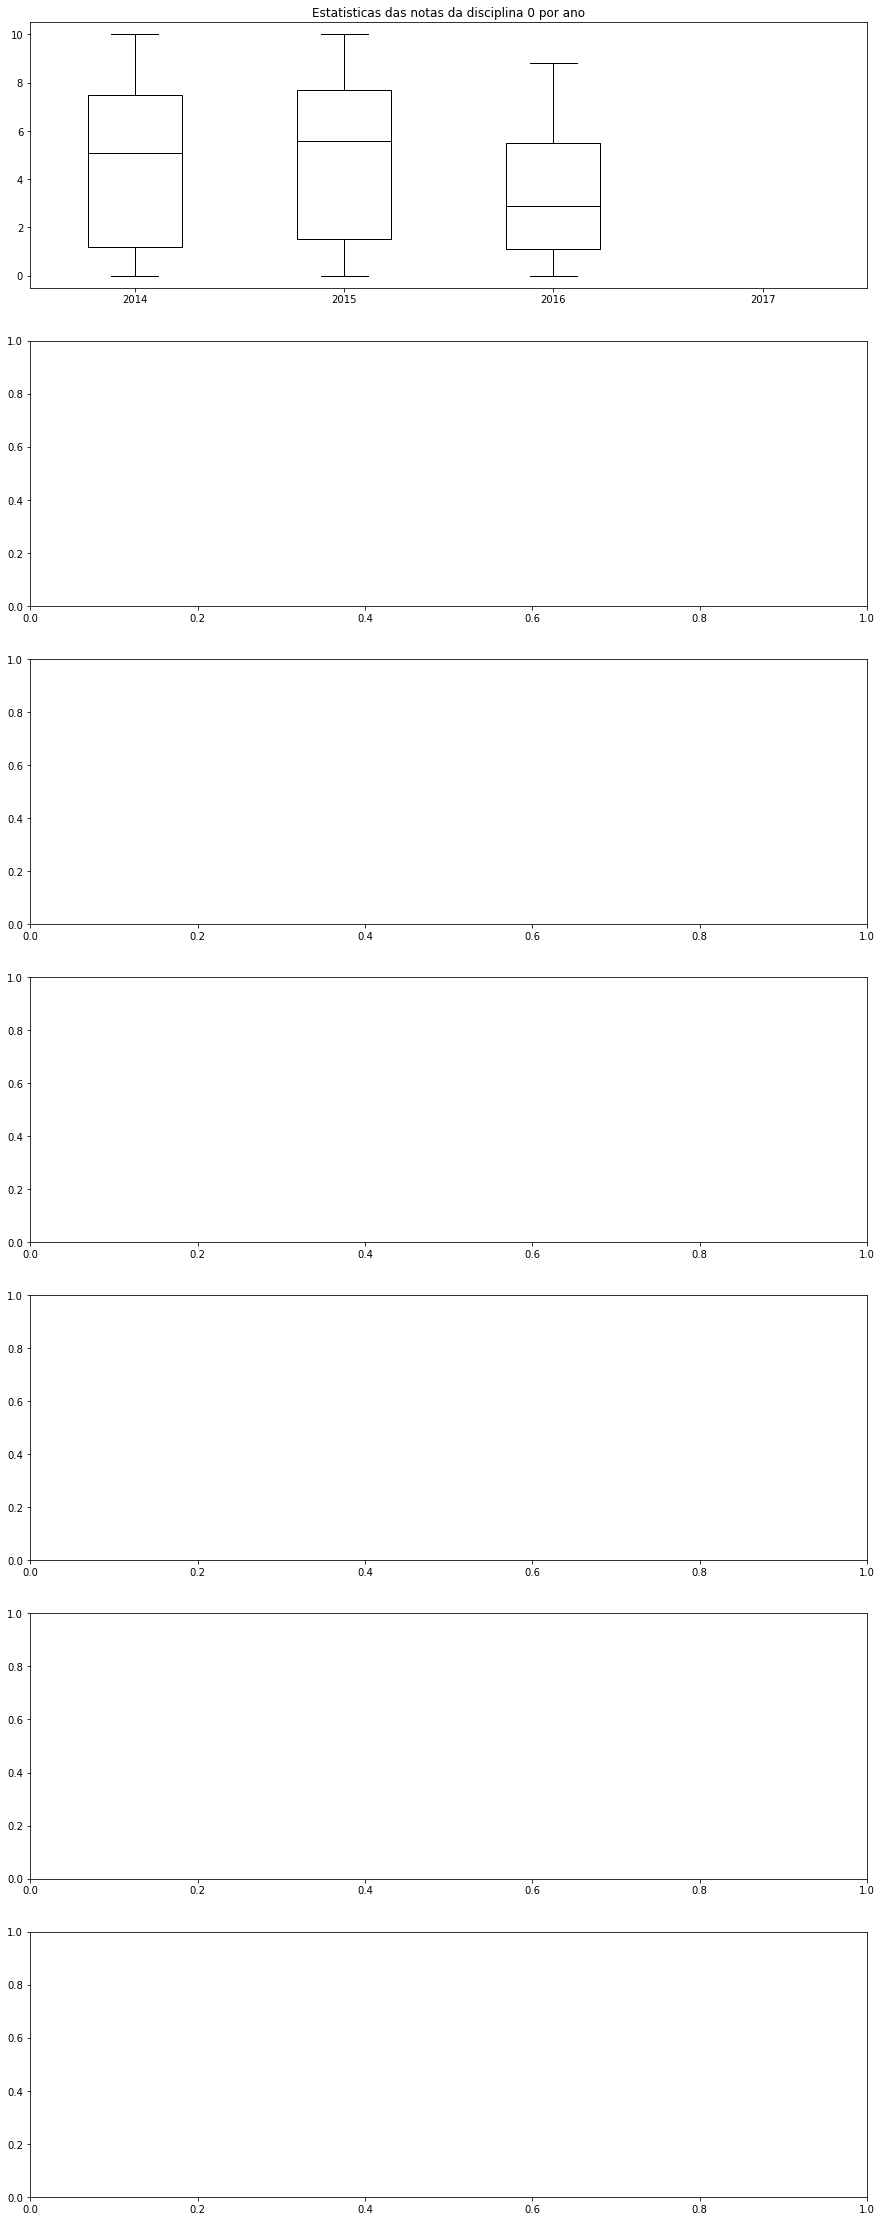

In [39]:
#Questao 3

#pegando os dados das disciplinas e dos anos correspondentes
list_disciplinas = dados['disciplina_ID'].unique()
list_anos = dados['ano_disciplina'].unique()

fig, axes = plt.subplots(nrows=len(list_disciplinas), ncols=1, figsize=(15,40))
dados1 = pd.DataFrame()
count = 0

#laco para percorrer os dados das notas
for disc in list_disciplinas:
    dados1.drop(dados1.index, inplace=True)
    axes[count].title.set_text('Estatisticas das notas da disciplina '+str(disc)+' por ano')   
    for ano in list_anos:
        dados1[ano] = pd.Series(dados.loc[(dados['disciplina_ID']==disc) & (dados['ano_disciplina']==ano)]['nota'].tolist())
    dados1.plot(kind='box', ax=axes[count], color='black')    
    count = count+1    
    plt.show()


Os boxplots apresentados foram elaborados com base nas notas de cada disciplina para os anos de 2014, 2015 e 2016. 
Através deles podemos verificar que para a disciplina 0, no ano de 2014 o centro dos dados (representado pelo Quartil 2) obteve notas que se aproximam mais do máximo, tendo uma assimetria negativa. Para o ano de 2015 os dados são parecidos, com uma pequena elevação do centro de dados em direção ao máximo. Já para o ano de 2016, o centro de dados fica mais próximo do Quarti 1, com uma aproximação maior do minímo.

Analisando os boxplots da disciplina 1, pode-se observar que para todos os anos analisados eles contém outliers, ou seja, eles possuem valores que estão bem distantes dos demais valores por estarem abaixo do valor minímo das notas analisadas. Para o ano de 2014 o centro de dados está mais centralizado, mostrando um equilíbrio entre a maioria das notas daquele ano, mas com uma pequena aproximação do Quartil 3, em 2015 a mediana se aproxima mais do Quartil 1, e a quantidade de outliers é menor do que a dos outros anos. Já para o ano de 2016 o número de outliers é bem maior do que dos outros anos.

Para disciplina 2, o ano de 2016 possui variação com a mediana se aproximando do quartil 3; No ano de 2014 aparecem algumas notas abaixo do minímo e o restante dos dados aparecem bem centralizados, com pouca variação; Já no ano de 2015 o box plot apresenta bastante outliers, indicando que muitas notas ficaram abaixo do minímo e o resto dos dados aparecem centralizados com uma pequena variação para baixo.

Para disciplina 3, os três anos apontam que os dados tem mediana que se aproximam mais do Quartil 1 e do valor minímo, principalmente no ano de 2016.

Para disciplina 4, os gráficos dos três anos apresentam dados com valores abaixo do valor minímo e distantes da concentração dos dados que ocorre bem centralizados, e apenas no ano de 2015 que possui uma pequena variação para o Quartil 3. Dar pra se observar que essa disciplina possui um conjunto de dados pequeno em relação as demais, o que indica que poucos alunos pagaram essa disciplina e muitos deles ficaram com notas abaixo da nota miníma, e os demais ficaram ali em torno da média.

Para disciplina 5, os dados dos anos de 2014 e 2015 aparecem bem centralizados, mas no ano de 2015 existe um variação miníma, com uma pequena tendência pro Quartil 3. Já no ano de 2016, esse equilíbrio mostrado nos anos anteriores, ele não acontece mais, e a mediana aproxima-se do Quartil 1 e também ocorre a aparição de alguns outliers.

Por fim, para disciplina 6, os gráficos nos mostra uma grande diferença entre as estatísticas das notas dos 3 anos, primeiro no de 2014 aparece alguns dados distantes da maioria e abaixo do valor minímo, e com mediana próxima ao Quartil 1; No ano de 2015 o número de notas parece ser maior, mas a mediana permanece com maior variação em direção do Quartil 1; E no ano de 2016 o número de dados é bem menor do que 2015, e a mediana permanece com aproximação ao Quartil 1.


b)


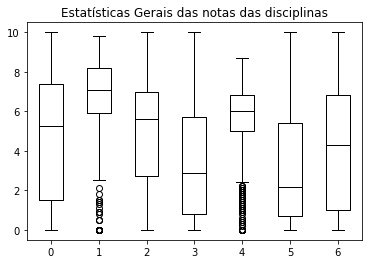

In [40]:
#b
dados1 = pd.DataFrame()
for disc in list_disciplinas:
    dados1[disc]=pd.Series(dados.loc[dados['disciplina_ID'] == disc]['nota'].tolist())
dados1.plot(kind='box',  color='black')

print ("b)")
plt.title('Estatísticas Gerais das notas das disciplinas')
plt.show()

No geral as estatísticas das notas para as 6 disciplinas, nos mostra que as disciplinas 0 e 6, são as que possuem maior variabilidade dos dados, e com aproximação maior para o quartil 3. As disciplinas 1 e 4, são as que possuem umaa grande concentração de outliers, o que indica que existe um grande número de notas abaixo do valor minímo, o que nos faz deduzir que são disciplinas com os maiores números de reprovações. A disciplina 2, possui uma mediana com dados se aproximando do Quartil 3, e as disciplinas 3 e 5 possuem variabilidade dos dados tendendo ao Quartil 1.

4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão

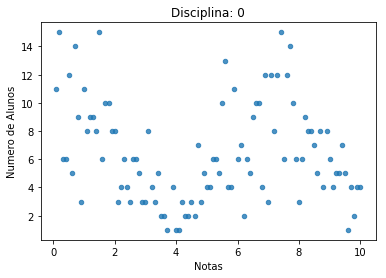

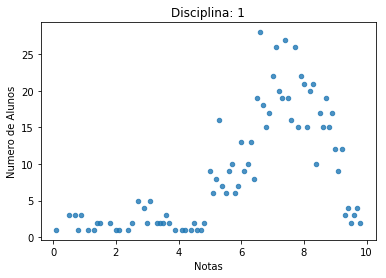

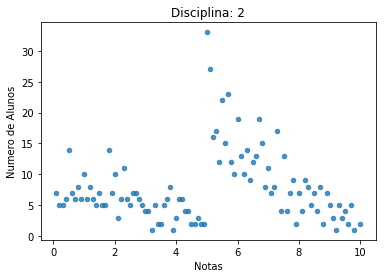

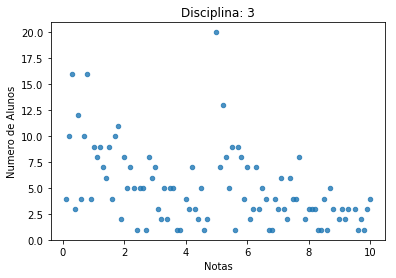

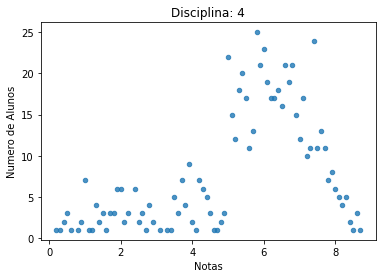

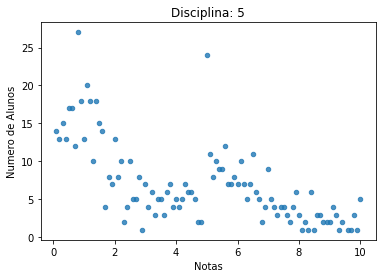

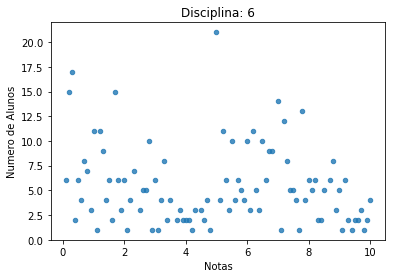

In [41]:
#Questão 4
import numpy as np

list_disc = dados.pivot_table(index=["nota"], columns=["disciplina_ID"], aggfunc={"nota":len}, )
list_disc.columns = list_disc.columns.droplevel(0)
list_disc = pd.DataFrame(list_disc.reset_index().rename_axis(None, axis=1))

fig = plt.figure(figsize=(20,20))

list_disc = list_disc[list_disc["nota"] != 0]

for i in range(7):
    ax = fig.add_subplot()
    ax = list_disc.plot(kind='scatter', x='nota', y=i, alpha=0.8)
    ax.set_xlabel("Notas")
    ax.set_ylabel("Numero de Alunos")
    ax.set_title("Disciplina: "+str(i))   
plt.show()

Os gráficos nos mostra que os dados das 7 disciplinas não tem nenhuma correlação entre eles, pois para todas as disciplinas os pontos não se agrupam em torno de uma linha reta, o que significa que não há relação entre as notas das 7 disciplinas. 

5) Existe uma relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho? Dispersão

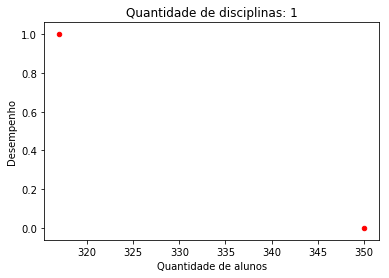

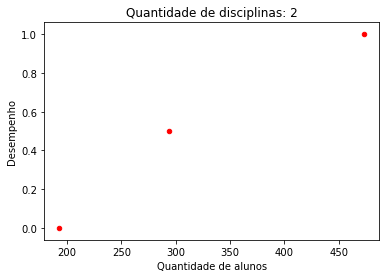

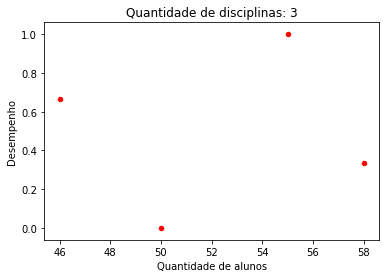

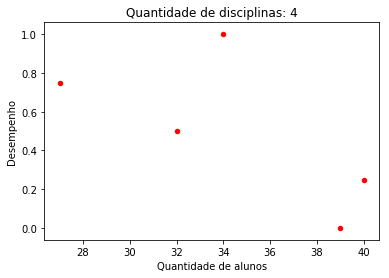

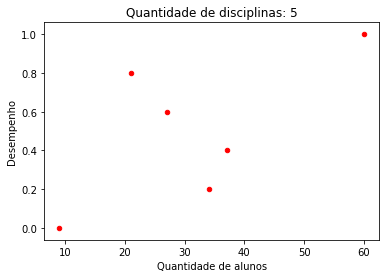

In [42]:
#Questão 5
import numpy as np

list_disc = dados.pivot_table(index=["a_ID",  "ano_disciplina", "periodo_disciplina", "disciplina_ID"], columns=["status.disciplina"],
               aggfunc={"status.disciplina":len},fill_value=0)

list_disc.columns = list_disc.columns.droplevel(0)
list_disc = pd.DataFrame(list_disc.reset_index().rename_axis(None, axis=1))
       
aluno_ID = list_disc['a_ID']
period = list(list_disc['periodo_disciplina'])
aprovation = list(list_disc['Aprovado'])
year = list(list_disc['ano_disciplina'])

quant_disc = list()
desempenho = list()

index = 0

for i in range(len(aluno_ID)):
    if i==0:
        quant_disc.append(1)
        desempenho.append(aprovation[0])
    else:
        if (aluno_ID[i-1] == aluno_ID[i]) & (year[i-1] == year[i]) & (period[i-1] == period[i]):
                quant_disc[index] += 1
                desempenho[index] += aprovation[i]
        else:
            quant_disc.append(1)
            desempenho.append(aprovation[i])
            index += 1    


for i in range(len(desempenho)):
    desempenho[i] = desempenho[i]/quant_disc[i]
    

dados2 = pd.DataFrame({'Disc_quant':quant_disc, 'desempenho':desempenho})
dados1 = dados2.pivot_table(index=["desempenho"], columns=["Disc_quant"],
               aggfunc={"Disc_quant":len},fill_value=0)

dados1.columns = dados1.columns.droplevel(0)
dados1 = pd.DataFrame(dados1.reset_index().rename_axis(None, axis=1))

fig = plt.figure(figsize=(10,20))

for i in range(1,6):
    number = dados1[dados1[i] != 0]
    ax = fig.add_subplot()
    ax = number.plot(kind='scatter', x=i, y='desempenho', color="red")
    ax.set_xlabel('Quantidade de alunos')
    ax.set_title('Quantidade de disciplinas: '+str(i))
    ax.set_ylabel('Desempenho')

plt.show()


Os gráficos foram criados com base no número de disciplinas que cada aluno paga por período de cada ano e o desempenho obtido por eles. Nos dados avaliados, nenhum aluno pagou mais do que 5 disciplinas em um semestre, por isso que foram criados 5 gráficos de acordo com a quantidade de disciplinas pagas. 

O gráficos nos mostra que quando um aluno pagou apenas 1 disciplina, 350 alunos foram reprovados e 317 alunos foram aprovados. O que nos dar uma taxa de 52,4% de reprovação e 47,6% de aprovação.
Quando um aluno paga 2 disciplinas, 190 alunos (23,5%) não foram aprovados em nenhuma disciplina, 295 alunos (29,2%)foram aprovados em apenas 1 das duas disciplinas, e 470 alunos foram aprovados nas duas disciplinas (47,3%). 

Quando o aluno paga 3 disciplinas, 50 alunos (28%) não foram aprovados em nenhuma disciplina, 58 alunos(22,3%) foram aprovados em apenas 1 disciplina, 46 alunos(23,2%) foram aprovados em 2 disciplinas e 55 alunos (26,5%) obtiveram êxito nas 3 disciplinas. 

Quando o aluno paga 4 disciplinas, 39 alunos (23%) não passaram em nenhuma disciplina, 40 alunos (23,5%) passaram em apenas 1 disciplina, 32 alunos (19%) passaram em 2 disciplinas, 27 alunos (12,5%) passaram em 3 disciplinas e 34 alunos (19%) foram aprovados nas 4 disciplinas.

Por fim, quando um aluno paga 5 disciplinas 9 alunos (2,5%) reprovaram em todas as disciplinas, 33 alunos passaram em apenas 1 disciplina, 38 alunos (20,5%) passaram em 2 disciplinas, 27 alunos (15%) passaram em 3 disciplinas, 20 alunos passaram em 4 disciplinas (11%)  e 59 alunos (32%) passaram nas 5 disciplinas. 

Assim, podemos concluir que quando os alunos optaram por pagar 2 ou 5 disciplinas, a taxa de aprovação em todas as disciplinas são maiores do que as demais.


6) Existe correlação entre a nota do enen e o status do aluno? Hist.

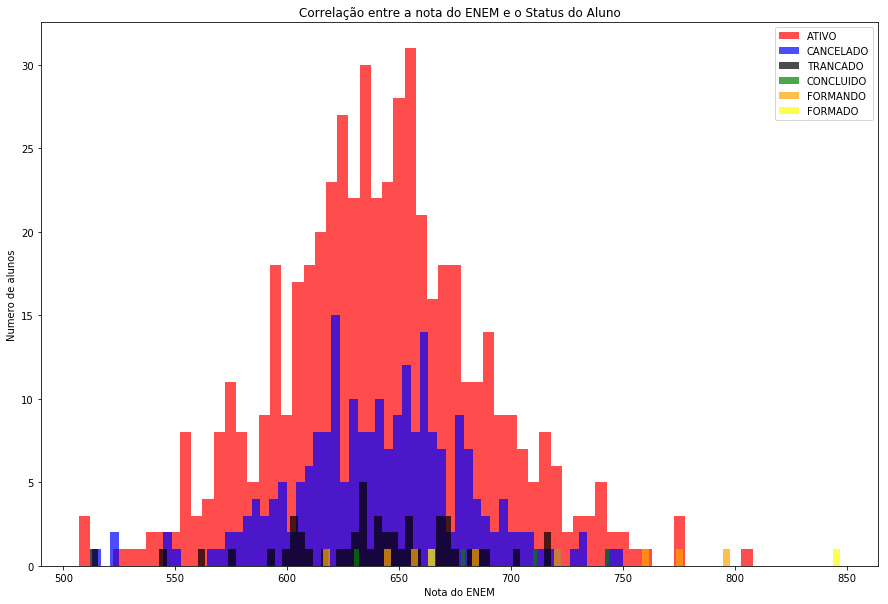

In [43]:
#Questao 6
fig = plt.figure(figsize=(15,10))

ativo = dados.loc[dados['status'] == "ATIVO"].drop_duplicates(subset='a_ID')
cancelado = dados.loc[dados['status'] == "CANCELADO"].drop_duplicates(subset='a_ID')
trancado = dados.loc[dados['status'] == "TRANCADO"].drop_duplicates(subset='a_ID')
concluido = dados.loc[dados['status'] == "CONCLUIDO"].drop_duplicates(subset='a_ID')
formando = dados.loc[dados['status'] == "FORMANDO"].drop_duplicates(subset='a_ID')
formado = dados.loc[dados['status'] == "FORMADO"].drop_duplicates(subset='a_ID')

ativo["enen-nota"].plot(kind='hist', color="red", label="ATIVO", bins=60, alpha=0.7,)
cancelado["enen-nota"].plot(kind='hist', color="blue", label="CANCELADO", bins=60, alpha=0.7)
trancado["enen-nota"].plot(kind='hist', color="black", label="TRANCADO", bins=60, alpha=0.7)
concluido["enen-nota"].plot(kind='hist', color="green", label="CONCLUIDO", bins=60, alpha=0.7)
formando["enen-nota"].plot(kind='hist', color="orange", label="FORMANDO", bins=60, alpha=0.7)
formado["enen-nota"].plot(kind='hist', color="yellow", label="FORMADO", bins=60, alpha=0.7)

plt.legend()
plt.xlabel('Nota do ENEM')
plt.ylabel('Numero de alunos')
plt.title("Correlação entre a nota do ENEM e o Status do Aluno")
plt.show()



Foram usados os seis tipos de status dos alunos e as notas do ENEM para criação do histograma aprensentado. 
O que podemos observar com esse gráfico é que a quantidade de alunos com o status formando ou formado é baixa e que eles tiveram notas do ENEM em torno de 640 e 850 aproximadamente; Os poucos alunos com status Concluido tiveram notas em torno de 630 e 750; Os alunos que estão com status trancado tem um maior concentração de notas do ENEM entre 600 e 730; Os alunos com status cancelado possuem uma maior concentração com notas do ENEM aproximadamente entre 620 e 660; A maioria dos alunos permanecem com o status ativo e tiveram notas do ENEM entre 600 e 700. 
Por fim, posso concluir que é bem relativo a correlação entre os status dos alunos com as notas que eles obtiveram no ENEM, pois  pode-se observar que tanto alunos que tiveram notas baixas, como alunos que tiveram notas em torno de 800 permanecem com o status ativo, e que a maioria dos alunos (com vários status diferentes) se concentram com notas em torno de 600 a 700. Por outro lado, os alunos que tiraram nota superior a 750 no ENEM, estão com status de formando ou formado, ou permanecem ativos no curso, e não tem nenhum aluno que tirou essa nota com status "negativo" de trancado ou cancelado, o que indica que alunos que tiraram notas mais altas no ENEM, permancem com um bom status no curso.

7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEM? Disperção

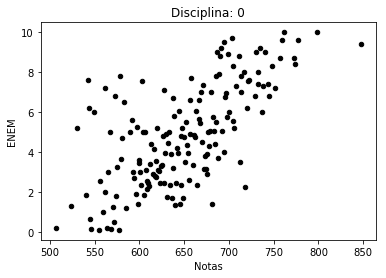

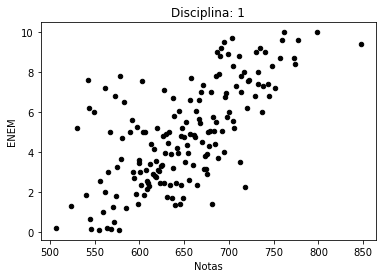

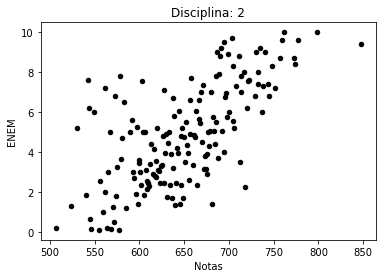

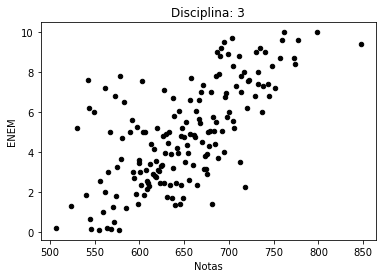

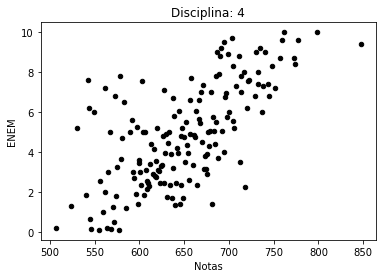

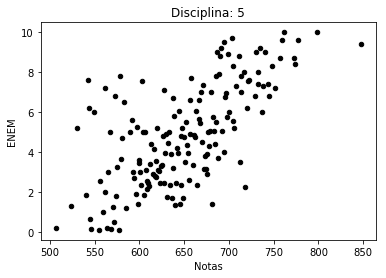

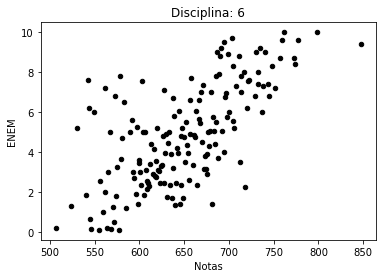

In [44]:
#Questão 7

import matplotlib.pyplot as plt

list_disc = dados.pivot_table(index=["enen-nota"], columns=["disciplina_ID"], aggfunc={"nota":np.mean},fill_value=0)
list_disc.columns = list_disc.columns.droplevel(0)
list_disc = pd.DataFrame(list_disc.reset_index().rename_axis(None, axis=1))

fig = plt.figure(figsize=(10,10))

for i in range(7): 
    ax = list_disc = list_disc.loc[list_disc[x] != 0]
    ax = fig.add_subplot()
    ax = list_disc.plot(kind='scatter', x='enen-nota', y=x, color="black")
    ax.set_xlabel("Notas")
    ax.set_ylabel("ENEM")
    ax.set_title("Disciplina: "+str(i))   
    
    plt.show()

Os gráficos nos mostra que as notas das disciplinas não tem correlação com as notas do ENEM, pois os pontos não se agrupam em torno de uma linha reta, o que significa que não há relação entre eles, e podemos observar que tiveram alunos que tiraram notas em torno de 550 e tiraram notas boas nas disciplinas, e também ocorreu em algumas disciplinas, alunos que tiraram em torno de 700 e tiraram notas baixas nas disciplinas. Houve alunos que tiraram notas altas em ambos, houve, mas isso não significa que existe uma correlação entre a nota do enem com as notas das disciplinas, já que a maioria dos alunos variam muito. 
